---

## B - Mysterious Modulation Lab

Nowadays, RF signals are everywhere in our society: try to use a spectrum analyser such as the gqrx (https://gqrx.dk/) software together with the bladeRF and on a sheet of paper, try to identify some common signals on the VHF/UHF side of the spectrum; you may use the SigID Wiki (https://www.sigidwiki.com/wiki/Signal_Identification_Guide) which is a comprehensive amateur collection of common signals.

Visually, you will see a great range of signal shapes on the waterfall plot (https://en.wikipedia.org/wiki/Waterfall_plot), which indicate different modulation techniques.

Alternatively, radio frequency (RF) signals assume integral roles across various facets of our society, functioning systematically to facilitate crucial communication. They range through mobile networks, terrestrial environments (encompassing both line-of-sight and beyond line-of-sight communication channels), satellite-based communications, and even extend to underwater realms. These signals serve as the linchpin, enabling essential systems and people to harmonize and coordinate seamlessly.

Since the code-breaking programs that took place at Bletchley Park during World War II, the dominance of the electromagnetic spectrum (collection & analysis of signals or disruption of unwanted channels) has been and remains a major technological and political challenge.

In this lab, you will be given 3 misterious signals based on common modulation schemes that you have studied in earlier notebooks.

Your objective will be to demodulate them and recover the "secret" message they contain.



---


For simplicity, we do not provide you with an I/Q (https://en.wikipedia.org/wiki/In-phase_and_quadrature_components) of a spectrum portion but uniquely with a noisy, isolated complex signal.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x_signal = np.load("test_modulation.npy")
print(x_signal)

[ 0.60770794-0.64892822j  0.79828541+0.7162215j  -0.70263586+0.57130809j
  0.70604658+0.77779716j  0.70540503-0.77065815j -0.72813942+0.59122474j
  0.75877278-0.77398865j  0.67170221-0.74903842j  0.67916927-0.81093173j
 -0.74672081+0.73536604j -0.64555398-0.65184194j  0.74073171+0.70550664j
  0.80520566-0.63632125j -0.71177841+0.73806705j -0.67712032-0.66675855j
  0.68213548+0.70290139j  0.6361708 -0.77280259j -0.62770431+0.83217153j
 -0.75861088-0.71582195j -0.85374321-0.70788042j  0.67270662+0.72517155j
 -0.72653142+0.69795401j  0.66975556+0.7664485j   0.83196616+0.81956326j
  0.79686399-0.80708639j  0.78991865-0.75459431j  0.63548416-0.62155801j
 -0.71846427-0.66146641j  0.67515362-0.652369j   -0.78673625+0.64789015j
 -0.80548103-0.67841906j -0.79198231-0.82776399j  0.73685575-0.68876659j
 -0.83550555-0.77888732j  0.80361856+0.5851995j  -0.65509502+0.71979211j
  0.66435557-0.83199934j -0.60658589+0.56482075j -0.74865822-0.62744891j
  0.7226682 +0.79508083j  0.7503492 -0.72045834j -0

Let's start by plotting a constellation diagram of our signal:

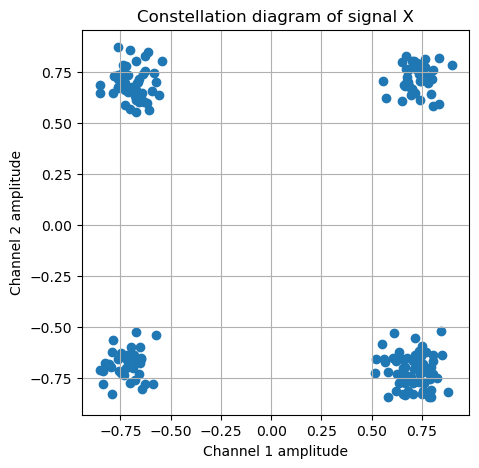

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(np.real(x_signal), np.imag(x_signal))
plt.title('Constellation diagram of signal X')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.grid()
plt.show()

Now that you have the constellation diagram of this unknown signal, let's write down some key information:
1. How many points are there on the constellation diagram (the constellation size)?
2. Is the amplitude constant for every symbol?
3. What parameter shifts, and how much times?
4. Up to which point is there noise, are the symbols recoverable?

Don't hesitate to check the common digital modulation tehniques on Wikipedia: https://en.wikipedia.org/wiki/Modulation#Digital_modulation_methods

Now that you have all the required information, we tell you that the information which is modulated is a simple UTF-8 text. It's your turn to code a simple demodulator for the modulation scheme you have identified.

In [24]:
# Hard-decision demodulator (simplest solution)

demodulated_bits = np.array([])

for symbol in x_signal:
    if(symbol.real > 0 and symbol.imag > 0):
        demodulated_bits = np.append(demodulated_bits, "0")
        demodulated_bits = np.append(demodulated_bits, "0")
    elif(symbol.real > 0 and symbol.imag < 0):
        demodulated_bits = np.append(demodulated_bits, "0")
        demodulated_bits = np.append(demodulated_bits, "1")
    elif(symbol.real < 0 and symbol.imag > 0):
        demodulated_bits = np.append(demodulated_bits, "1")
        demodulated_bits = np.append(demodulated_bits, "0")
    elif(symbol.real < 0 and symbol.imag < 0):
        demodulated_bits = np.append(demodulated_bits, "1")
        demodulated_bits = np.append(demodulated_bits, "1")


bin_string = ''.join(map(str, demodulated_bits))
chunks = [bin_string[i:i+8] for i in range(0, len(bin_string), 8)]
decoded_string = ''.join(chr(int(chunk, 2)) for chunk in chunks)

print(decoded_string)

Hello World; this is a random assignment message
